In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### create a data to view and fit

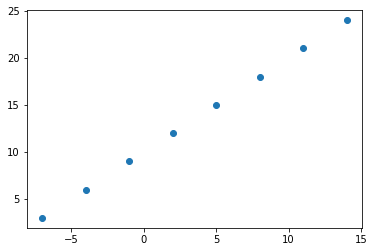

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
X.shape, y.shape

((8,), (8,))

In [6]:
X[0].shape

()

In [7]:
X[0].ndim

0

In [8]:
# turn numpy arrays to tensors with float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

### steps in modelling
* create model
* compile model - define loss function, optimizer, and evaluation metrics (used to interpret models)
* fit model - let model try to find patterns between X & y

In [10]:
tf.random.set_seed(42)

# create model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)    
])

# compile
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 486ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# make a prediction with model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 71ms/step


array([[12.716021]], dtype=float32)

### improve the model
* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer

* Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)    
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])  # mae - mean absolute error

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 226ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [14]:
# improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 47ms/step


array([[30.158512]], dtype=float32)

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 311ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - 

In [17]:
# improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 50ms/step


array([[31.382648]], dtype=float32)

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.Adam(lr=0.01),
            metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 294ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4.1246 -

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[26.206875]], dtype=float32)

### Evaluating model

When it comes to evaluation, you'll want to remember the words: visualize

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* data - what data are you working with? What does it look like?
* model itself - what does the architecture look like? What are the different shapes?
* training of a model - how does a model perform while it learns?
* predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [20]:
# bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

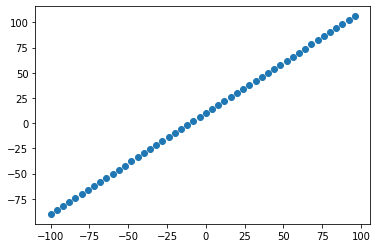

In [22]:
plt.scatter(X, y)

### 3 sets

* training set
* cross validation set
* test set

In [23]:
len(X)

50

In [25]:
X_train = X[:40]  # first 40, 80%
y_train = y[:40]

X_test = X[40:]  # last 10, 20%
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### visualize

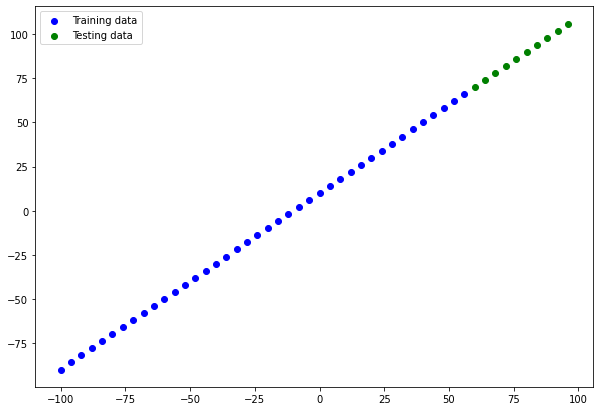

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(X_train, y_train, epochs=100)

In [28]:
model.summary()

ValueError: ignored

In [29]:
# create a model that builds automatically
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [31]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name= "model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [48]:
#model.fit(X_train, y_train, epochs=100, verbose=0)
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 21.1705 - mae: 21.1705
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1893 - mae: 9.1893
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 22.2847 - mae: 22.2847
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 20.5870 - mae: 20.5870
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0795 - mae: 10.0795
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1211 - mae: 8.1211
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2794 - mae: 9.2794
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 16.3483 - mae: 16.3483
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 21.4736 - mae: 21.4736
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0789 - mae: 12.0789
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

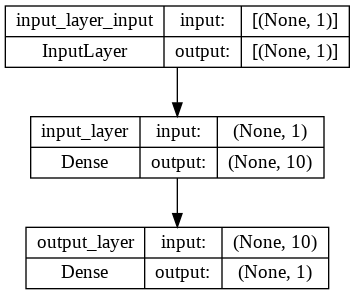

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [50]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 21ms/step


array([[44.72611 ],
       [47.445663],
       [50.165215],
       [52.884777],
       [55.60433 ],
       [58.323883],
       [61.043438],
       [63.762997],
       [66.482544],
       [69.2021  ]], dtype=float32)

In [52]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [53]:
# plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # plot training set in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show legend
  plt.legend();


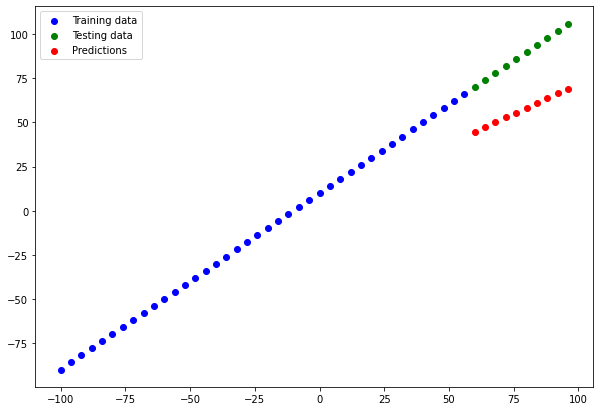

In [54]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
* The lower each of these values, the better.

In [55]:
# evaluate model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 31.0359 - mae: 31.0359


[31.0358943939209, 31.0358943939209]

In [56]:
# calculate mae
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.27389 , 40.554337, 37.834785, 35.115223, 32.39567 , 29.676117,
       26.956562, 24.237003, 21.517456, 18.797897], dtype=float32)>

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [58]:
y_pred

array([[44.72611 ],
       [47.445663],
       [50.165215],
       [52.884777],
       [55.60433 ],
       [58.323883],
       [61.043438],
       [63.762997],
       [66.482544],
       [69.2021  ]], dtype=float32)

In [59]:
y_pred.shape

(10, 1)

In [60]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.72611 , 47.445663, 50.165215, 52.884777, 55.60433 , 58.323883,
       61.043438, 63.762997, 66.482544, 69.2021  ], dtype=float32)>

In [61]:
# calculate mae
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=31.035894>

In [62]:
# calculate mse
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=976.7529>

In [71]:
def mae(y_true, y_pred):
  mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
  return mae

In [72]:
def mse(y_true, y_pred):
  mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
  return mse

### Experiments to improve our model

####model_1

In [67]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step 

1/1 [==============================] - 0s 83ms/step


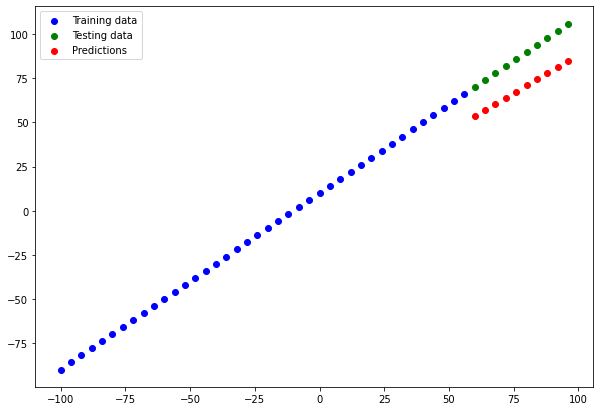

In [68]:
# plot and predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [73]:
# calc model_1 mae
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

#### model_2

In [74]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 223ms/step


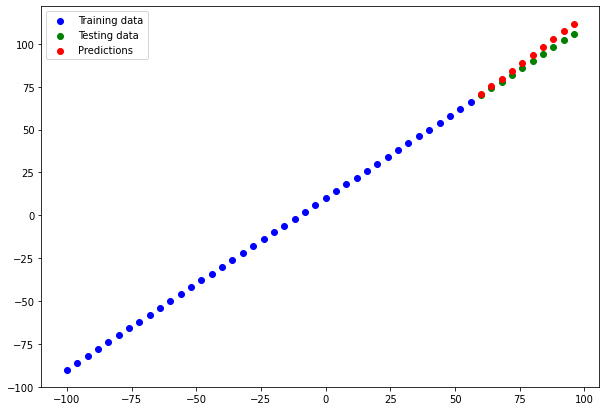

In [75]:
# plot and predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [76]:
# calc model_2 mae
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

#### model_3

In [77]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 28ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 15ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 33ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 63ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 150ms/step


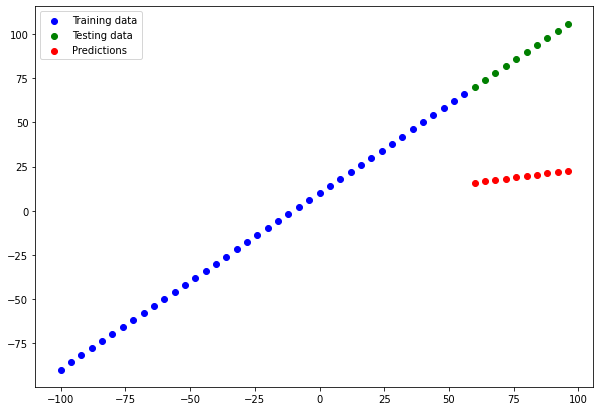

In [78]:
# plot and predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [79]:
# calc model_3 mae
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

overfitting

### compare results

In [80]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


model_2 performed the best

## Tracking experiments
##### Tensorboard - component of tensorflo library to track modelling experiments

#### saving model - allov us to use our model outside

* SavedModel format
* HDF5 format

In [81]:
# SavedModel format
model_2.save("best_model_SavedModel_format")

In [82]:
# HDF5 format
model_2.save("best_model_HDF5_format.h5")

#### load in saved model

In [85]:
load_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
load_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [87]:
load_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
load_HDF5_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
